# PROJETO INTEGRADO
Luiz Guilherme Graciano Ribeiro Pereira

A atividade consiste em analisar os dados coletados de 2016 de uma loja de online. A loja online Ice, vende videogames no mundo todo, os dados a serem analisados são os dados históricos sobre vendas de jogos. O objetivo é identificar possíveis sucessos para planejar uma campanha publicitária para 2017.





Descrição de dados:
- `Name` (nome)
- `Platform` (plataforma)
- `Year_of_Release` (Ano de lançamento)
- `Genre`(gênero)
- `NA_sales` (vendas norte-americanas em milhões de USD)
- `EU_sales` (vendas na Europa em milhões de USD)
- `JP_sales` (vendas no Japão em milhões de USD)
- `Other_sales` (vendas em outros países em em milhões de USD)
- `Critic_Score` - (Pontuação crítica) (máximo de 100)
- `User_Score` - (Pontuação do usuário) (máximo de 10)
- `Classificação` (ESRB)

Ratings:
- Everyone: Conteúdo geralmente adequado para todas as idades.
- Everyone: 10+ Conteúdo geralmente adequado para idades a partir de 10 anos.
- Teen: Conteúdo geralmente adequado para idades a partir de 13 anos.
- Mature: 17+ Conteúdo geralmente adequado para idades a partir de 17 anos.
- Adults: Somente para maiores de 18 anos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
from scipy.stats import ttest_ind
from scipy.stats import levene

In [2]:
try:
    games = pd.read_csv('games.csv')
except:
    games = pd.read_csv('/datasets/games.csv')
    

## PREPARO DOS DADOS

### Identificação dos Problemas

In [3]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
games.tail()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [5]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
games.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Problemas encontrados nos dados:
- Necessario modificar o nome das colunas, colocar em letra minúscula todos os nomes.

- As colunas `user_score` está com o tipo de dados incorreto. `user_score` está como *object*, o tipo correto é  *float*.

- As colunas `name`, `year_of_release`, `genre`, `critic_score`, `user_score` e `rating` possuem valores ausentes. Deve ser investigado o motivo.

### Correção do nome das colunas :

In [7]:
games.columns = games.columns.str.lower()
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Converção da coluna `user_score` em *float* :

In [8]:
games.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

In [9]:
games['user_score'].value_counts(normalize=True)

tbd    0.242061
7.8    0.032355
8      0.028959
8.2    0.028161
8.3    0.025364
         ...   
0.7    0.000200
1      0.000200
9.6    0.000200
9.7    0.000100
0      0.000100
Name: user_score, Length: 96, dtype: float64

A coluna `user_score` está como *object*, possui 24,20% dos valores como *tbd* (pontuação da usuário a ser determinada). 

Para converter o tipo dessa coluna é necessário retirar o *tbd*, sendo assim, foi decidido pela criação de uma nova coluna booleana `tbd_score`( 1 sendo *tbd*, 0 não sendo *tbd*) para armazenar o *tbd* na tabela, que será excluído da coluna `user_score`.

In [10]:
games['tbd_score'] = np.where(games['user_score'] != 'tbd', 0, 1)

In [11]:
games.query('user_score == "tbd"').head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,tbd_score
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.00,0.66,NaN,tbd,E,1
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.00,0.54,61.0,tbd,E10+,1
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.00,0.27,NaN,tbd,T,1
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.00,0.20,71.0,tbd,E,1
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E,1
718,Just Dance Kids,Wii,2010.0,Misc,1.52,0.54,0.00,0.18,NaN,tbd,E,1
726,Dance Dance Revolution X2,PS2,2009.0,Simulation,1.09,0.85,0.00,0.28,NaN,tbd,E10+,1
821,The Incredibles,GBA,2004.0,Action,1.15,0.77,0.04,0.10,55.0,tbd,E,1
881,Who wants to be a millionaire,PC,1999.0,Misc,1.94,0.00,0.00,0.00,NaN,tbd,E,1
1047,Tetris Worlds,GBA,2001.0,Puzzle,1.25,0.39,0.00,0.06,65.0,tbd,E,1


As variáveis que possuirem *tbd*(pontuação a ser determinada) na coluna `user_score` terão o valor igualado a *nan*, por não haver informações adicionais de para tratá-lo os valores podem ser considerados ausentes. A informação ficará salva na coluna `tbd_score`

A coluna `user_score` vai ser convertida em *float*, com os valores *tbd* transformados em *nan*.

In [12]:
games['user_score']= pd.to_numeric(games['user_score'], errors='coerce')

In [13]:
games['user_score'].value_counts()

7.8    324
8.0    290
8.2    282
8.3    254
8.5    253
      ... 
0.9      2
1.9      2
1.3      2
9.7      1
0.0      1
Name: user_score, Length: 95, dtype: int64

In [14]:
games.query('tbd_score == 1').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,tbd_score
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,NaN,E,1
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,NaN,E10+,1
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,NaN,T,1
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,NaN,E,1
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,NaN,E,1


In [15]:
games.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
tbd_score            int64
dtype: object

Coluna `user_score` convertida.

### Identificação de os valores ausentes possuem razão:

In [16]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
 11  tbd_score        16715 non-null  int64  
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


In [17]:
games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
tbd_score             0
dtype: int64

In [18]:
games.isna().sum() / len(games)

name               0.000120
platform           0.000000
year_of_release    0.016093
genre              0.000120
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513192
user_score         0.545917
rating             0.404786
tbd_score          0.000000
dtype: float64

Existem valores ausentes nas colunas `name`, `year_of_release`, `genre`, `critic_score`, `user_score` e `rating`.

Na coluna `critic_score` e `user_score` os valores ausentes representa 50% dos dados, enquanto na coluna `rating` representam 40%. Essas colunas serão investigadas para entender o motivo da ausência e a possibilidade dessas colunas serem retiradas. 

Nas outras colunas com valores ausentes, eles não representam mais do que 1%, então essas linhas serão deletadas.

In [19]:
games = games.dropna(subset=['name','year_of_release','genre']).reset_index(drop=True)

In [20]:
games.isna().sum() / len(games)

name               0.000000
platform           0.000000
year_of_release    0.000000
genre              0.000000
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.514534
user_score         0.546157
rating             0.405984
tbd_score          0.000000
dtype: float64

As linhas que possuiam valores ausentes nas colunas `name`, `year_of_release`, `genre` foram deletadas.

In [21]:
len(games.query('user_score.isna() and critic_score.isna() and rating.isna()'))

6580

Os valores ausentes das colunas `critic_score`, `user_score` e `rating` não podem ser preenchidos, por não haver valores na tabela que estajam ligados a eles. Dessa forma, também não é possível identificar a razão deles estarem ausentes.Os linhas com os dados ausentes não serão deletadas por representarem 54% dos do dataframe. Sendo assim, os valores não serão subsitituidos e as linhas não serão deletadas, mas as futuras análises nessas colunas serão limitadas.

### Criação da Coluna `total_sales`:

Para futuras análise das vendas em de cada jogo em cada região e o total de vendas, será criada a coluna `total_sales` que possuirá a soma das colunas `na_sales`, `eu_sales`, `jp_sales` e `other_sales`.

In [22]:
games['total_sales'] = games['na_sales'] +  games['eu_sales'] + games['jp_sales'] + games['other_sales'] 

In [23]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,tbd_score,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,0,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,0,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,0,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,0,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,0,31.38


## ANÁLISE DOS DADOS

### Tendência de lançamento por ano: 

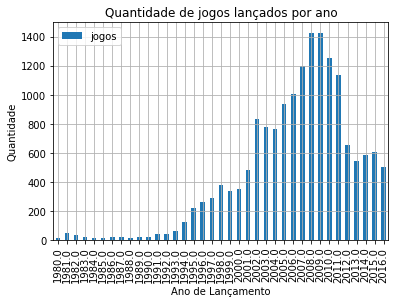

In [24]:
games.pivot_table(index='year_of_release',values='name',aggfunc='count').rename(columns={'name':'jogos'}).plot(kind='bar',grid=True)
plt.title('Quantidade de jogos lançados por ano')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Quantidade')
plt.show()

A partir do gráfico é possível identificar uma tendência de alta para o lançamento de jogos a cada ano, com o pico sendo 2008 e 2009, com mais de 1400 jogos lançados em cada ano. A partir de 2010 é vista uma tendência de queda, com 2016 tendo algo entorno de 500 jogos lançados. Essa tendência coincidi com a entrada da nova geração de consoles(PS3, XBOX360, WII) no mercado.

### Variação entre as vendas e a plataforma:

In [25]:
games_sales = games.pivot_table(index='platform', values='total_sales',aggfunc='sum')\
.sort_values(by='total_sales',ascending=False)

display(games_sales.head(10))

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


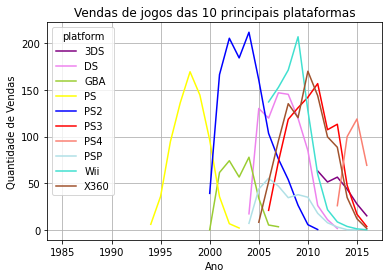

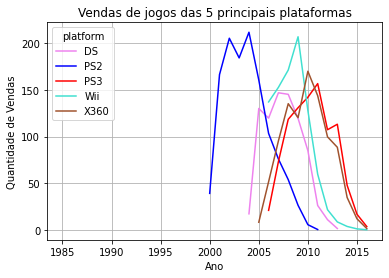

platform,DS,PS2,PS3,Wii,X360
year_of_release,,,,,
1985.0,0.02,NaN,NaN,NaN,NaN
2000.0,NaN,39.17,NaN,NaN,NaN
2001.0,NaN,166.43,NaN,NaN,NaN
2002.0,NaN,205.38,NaN,NaN,NaN
2003.0,NaN,184.31,NaN,NaN,NaN
2004.0,17.27,211.81,NaN,NaN,NaN
2005.0,130.14,160.66,NaN,NaN,8.25
2006.0,119.81,103.42,20.96,137.15,51.62
2007.0,146.94,75.99,73.19,152.77,95.41


In [26]:
games_sales_1 = games_sales.head(10)
games_sales_2 = games_sales.head(5)

#mcolors.CSS4_COLORS

keys = games_sales.head(10).index
cl =  { 'blue': '#0000FF',
       'sienna': '#A0522D',
     'red': '#FF0000',
     'turquoise': '#40E0D0',
     'violet': '#EE82EE',
     'yellow': '#FFFF00',
     'salmon': '#FA8072',
     'yellowgreen': '#9ACD32',
     'powderblue': '#B0E0E6',
     'purple': '#800080',
}    

colors = {key: color for key, color in zip(keys, cl.values())}

games.query('platform in @games_sales_1.index')\
.pivot_table(index='year_of_release',values='total_sales',columns='platform',aggfunc='sum')\
.plot(grid=True,color = colors)
plt.title('Vendas de jogos das 10 principais plataformas')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Vendas')
plt.show()

games.query('platform in @games_sales_2.index')\
.pivot_table(index='year_of_release',values='total_sales',columns='platform',aggfunc='sum')\
.plot(grid=True,color = colors )
plt.title('Vendas de jogos das 5 principais plataformas')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Vendas')
plt.show()

display(games.query('platform in @games_sales_2.index').pivot_table(index='year_of_release',columns= 'platform', values='total_sales',aggfunc='sum'))

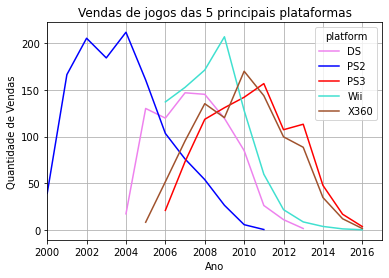

In [27]:
games.query('platform in @games_sales_2.index')\
.pivot_table(index='year_of_release',values='total_sales',columns='platform',aggfunc='sum')\
.plot( grid=True,color = colors)
plt.title('Vendas de jogos das 5 principais plataformas')
plt.xlabel('Ano')
plt.xlim([2000,2017])
plt.ylabel('Quantidade de Vendas')
plt.show()

A partir de uma análise visual da venda de jogos por plataforma, da 10 e 5 principais plataformas, de 1985 à 2016 . Foi identificado um tempo de uma vida da plataforma é de aproximadamente 10 anos. 

As plataformas que são sucessoras(do PS2 para o PS3) surgem tendo uma tendência de alta, enquanto a plataforma predecessora já está tendência de queda. Com o pico de vendas de jogos das plataformas sucessoras estando próximo do final da vida das plataformas predecessoras.

Com o período de vida de uma plataforma sendo de aproximadamente 10 anos, para a análise e previsão para 2017 foi decidico usar os dados dos últimos 3 anos. Dessa forma, os dados utilizados serão de 2014 à 2016, o restante será desconsiderado.

In [28]:
games_good = games.query('year_of_release > 2013')

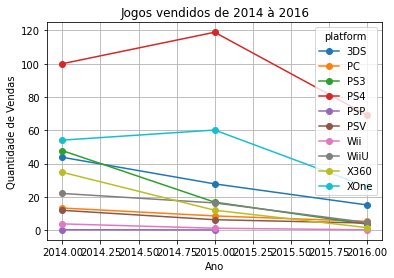

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2014.0,43.76,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015.0,27.78,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016.0,15.14,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


In [29]:
games_good\
.pivot_table(index='year_of_release',columns= 'platform', values='total_sales',aggfunc='sum')\
.plot(grid=True, style='o-')
plt.title('Jogos vendidos de 2014 à 2016')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Vendas')
plt.show()

display(games_good.pivot_table(index='year_of_release',columns= 'platform', values='total_sales',aggfunc='sum'))

As plataformas que estão liderando as vendas em 2016 são o PS4 com 69 milhões, XOne com 26 milhões e o 3DS com quase 15 milhões de 
vendas de jogos para a plataforma. As outras plataformas tiveram menos de 20 milhões somadas, com nenhuma acima de 6 milhões.

Entre 2015 e 2016 todas as plataformas estão em tedência de queda. As plataformas mais interessantes para fazer campanha publicitária para 2017 seriam o PS4 e o XOne.

In [30]:
games_atual = games.query('year_of_release > 2013')

### Boxplot de vendas de jogos separados por plataforma:

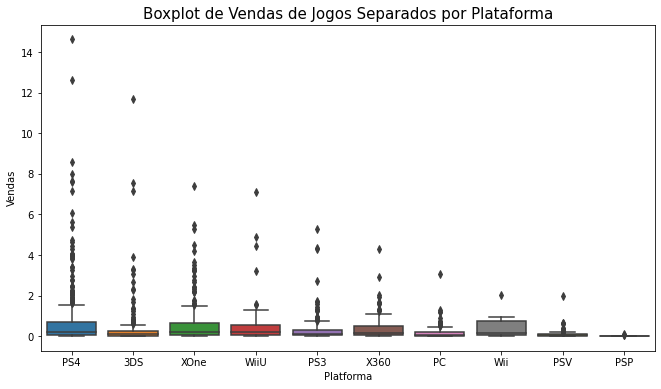

In [31]:
#games_atual
plt.figure(figsize=(11,6))
sns.boxplot(x='platform', y='total_sales', data=games_atual)
#plt.ylim(0,15)
plt.ylabel('Vendas')
plt.xlabel('Platforma')
plt.title('Boxplot de Vendas de Jogos Separados por Plataforma', size=15)
plt.show()

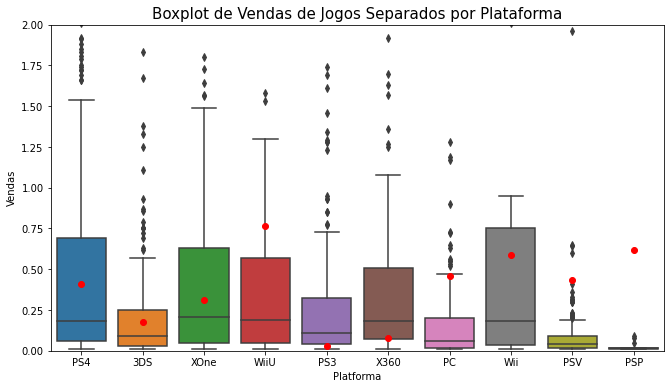

In [32]:
plt.figure(figsize=(11,6))
sns.boxplot(x='platform', y='total_sales', data=games_atual)
plt.ylim(0,2)
plt.ylabel('Vendas')
plt.xlabel('Platforma')
plt.title('Boxplot de Vendas de Jogos Separados por Plataforma', size=15)

# Adicionar um ponto vermelho na média de cada plataforma
medias = games_atual.groupby('platform')['total_sales'].mean().values
posicoes = range(len(medias))
plt.plot(posicoes, medias, 'ro')

plt.show()

Existem diferenças bem significativas nas vendas entre as plataformas. Variás plataformas possuem certos jogos que vendenram muito em relação a mediana, isso representa que as plataformas possuem determinados jogos de representam a maior parte das vendas dessa plataformas. 

### Gráficos de dispersão das avaliações de usuários e profissionais e as vendas totais:

Vou analisar como as avaliações de usuários e profissionais afetam as vendas de uma plataforma popular, o PS4.

In [33]:
games_ps4 =games_atual.query('platform == "PS4"')

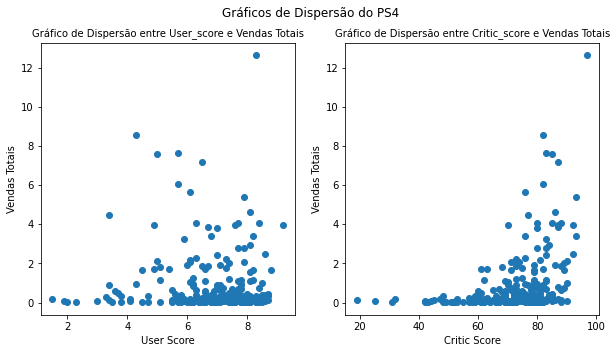

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

fig.suptitle('Gráficos de Dispersão do PS4')

ax1.scatter(games_ps4['user_score'], games_ps4['total_sales'])
ax1.set_title('Gráfico de Dispersão entre User_score e Vendas Totais', fontsize=10)
ax1.set_xlabel('User Score')
ax1.set_ylabel('Vendas Totais')

ax2.scatter(games_ps4['critic_score'], games_ps4['total_sales'])
ax2.set_title('Gráfico de Dispersão entre Critic_score e Vendas Totais', fontsize=10)
ax2.set_xlabel('Critic Score')
ax2.set_ylabel('Vendas Totais')

plt.show();

In [35]:
corr_user = games_ps4['user_score'].corr(games_ps4['total_sales'])
print(f"A correlação entre user_score e total_sales é de: {corr_user}")

corr_critic = games_ps4['critic_score'].corr(games_ps4['total_sales'])
print(f"A correlação entre citric_score e total_sales é de: {corr_critic}")

A correlação entre user_score e total_sales é de: -0.040131589472697356
A correlação entre citric_score e total_sales é de: 0.40266141068104083


As avaliações de usuários não afetam as vendas totais dos jogos, a releção é quase não existente. As avaliações de profissionais possui uma relação positiva com as vendas totais, de 0.40, quanto melhor a avaliação maior tende ser as vendas, mas ainda não é possível saber qual deles é a causa.

### Comparação da venda do jogo mais vendido entre as plataformas:

In [36]:
games_atual.pivot_table( index='name', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).head(3)

,total_sales
name,
Call of Duty: Black Ops 3,25.67
Call of Duty: Advanced Warfare,21.97
Grand Theft Auto V,19.26


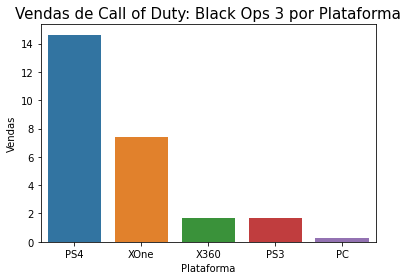

In [37]:
sns.barplot(x='platform', y='total_sales', data=games_atual.query('name == "Call of Duty: Black Ops 3"'))

plt.ylabel('Vendas')
plt.xlabel('Plataforma')
plt.title('Vendas de Call of Duty: Black Ops 3 por Plataforma', size=15)

plt.show()

O jogo mais vendido do período foi o "Call of Duty: Black Ops 3", a maior parte das vendas foram no PS4 e no XOne, a distribuição da venda está relativa a distribuição das vendas totais por plataforma.

### Distribuição geral de jogos por gênero:

Agora verei a distribuição geral de jogos por gênero, quais são os mais lucrativos.

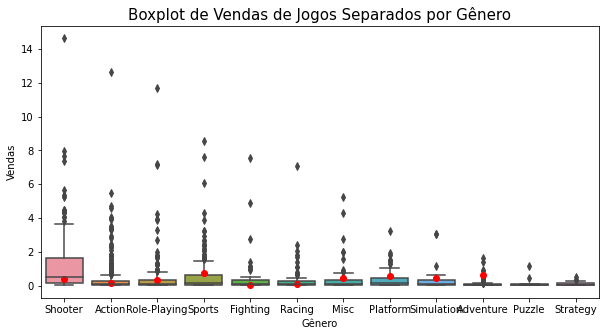

In [38]:
plt.figure(figsize=(10,5))
sns.boxplot(x='genre', y='total_sales', data=games_atual)
#plt.ylim(0,2)
plt.ylabel('Vendas')
plt.xlabel('Gênero')
plt.title('Boxplot de Vendas de Jogos Separados por Gênero', size=15)

# Adicionar um ponto vermelho na média de cada plataforma
medias = games_atual.groupby('platform')['total_sales'].mean().values
posicoes = range(len(medias))
plt.plot(posicoes, medias, 'ro')

plt.show()

Os gêneros mais lucrativos são "Shooter", "Action" e "Role-Playing". Os principais gêneros também são os que possuem os maiores outliners, sendo que esses outlines os jogos mais vendidos do período, colocando esses gêneros como os mais vendidos.

### Criação um perfil de usuário para cada região:

In [39]:
def region_bar(region,name):
    fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(12, 6))
    fig.suptitle(name)

    games_atual.pivot_table(index= 'platform', values= region, aggfunc='sum').sort_values(by=region, ascending=False).head(5)\
    .plot(kind='bar', ax=ax1)
    ax1.set_title('Gráfico de Barras das Principais Plataformas', fontsize=10)
    ax1.set_xlabel('Plataforma')
    ax1.set_ylabel('Vendas')

    games_atual.pivot_table(index= 'genre', values= region, aggfunc='sum').sort_values(by=region, ascending=False).head(5)\
    .plot(kind='bar', ax=ax2)
    ax2.set_title('Gráfico de Barras dos Principais Gêneros', fontsize=10)
    ax2.set_xlabel('Gênero')
    ax2.set_ylabel('Vendas')

    games_atual.pivot_table(index= 'rating', values=region, aggfunc='sum').sort_values(by=region, ascending=False)\
    .plot(kind='bar', ax=ax3)
    ax3.set_title('Gráfico de Barras dos Principais ESRB', fontsize=10)
    ax3.set_xlabel('ESRB')
    ax3.set_ylabel('Vendas')


    plt.show();

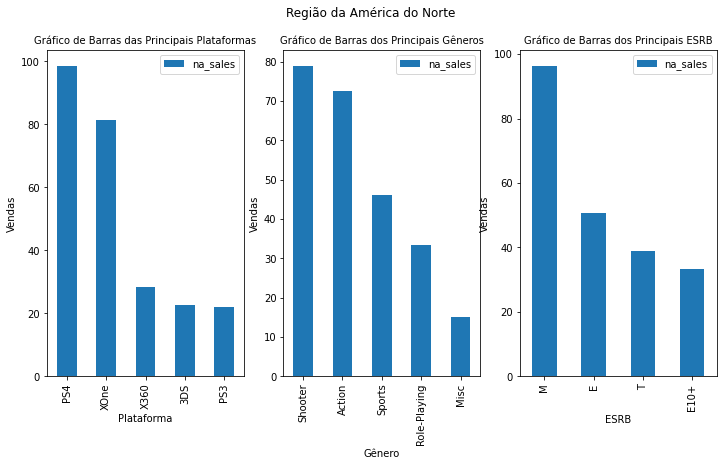

In [40]:
region_bar('na_sales', 'Região da América do Norte')

A região da América do Norte possui o PS4 e XOne como os principais consoles, e os gêneros "Shooter" e "Action" como os principais.  "Shooter" e "Action" normalmente são jogos violentos, então faz sentido a principal classificação ser "M"( acima de 17 anos) ser a principal. A distribuição da América do Norte assemelha-se a distribuição das vendas totais.

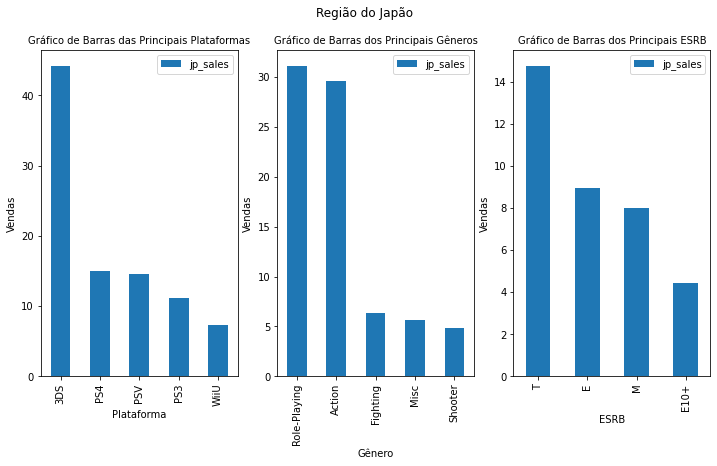

In [41]:
region_bar('jp_sales', 'Região do Japão')

A região da Japão possui o 3DS como o principal console, e os gêneros "Role-Playing" e "Action" como os principais. O 3DS e feito pela Nitendo, famosa por seus jogos para família, o que está relacionado com as principais classificações serem "T" (a partir de 13 anos) e "E"( para todas as idades). 

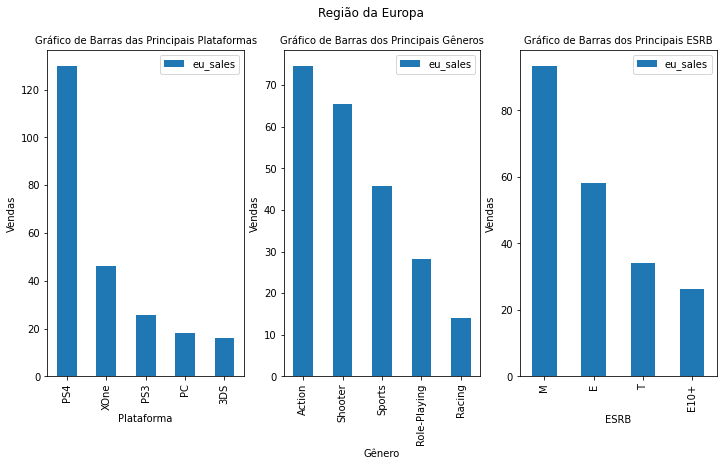

In [42]:
region_bar('eu_sales', 'Região da Europa')

A região da Europa possui o PS4 como o principal console, e os gêneros "Action" e  "Shooter"  como os principais. "Shooter" e "Action" normalmente são jogos violentos, então faz sentido a principal classificação ser "M"( acima de 17 anos) ser a principal. A distribuição da Europa é parecida com a da América do Norte, a principal diferença que o XOne possui uma porcentagem de vendas bem menor do que na América do Norte. Os gêneros também são parecidos com os da América do Norte.

Em conclusão, o perfil de usuário da região da América do Norte e da Europa são bem parecidos, com o console PS4 liderando o mercado. Os principais gêneros sendo "Shooter" e "Action", a posição está invertida na Europa. A classificação mais comum sendo "M". A principal diferença é na América do Norte o PS4 e XOne tem vendas próximas, na Europa o PS4 domina de forma massiva.

O perfil do Japão é diferente, com o principal console sendo o 3DS. Os principais gêneros sendo "Role-Playing" e "Action", e a classificação mais comum sendo "T". O usuário japonês consome jogos de RPG jogando no consele 3DS. 

## TESTE DE HIPÓTESES

Os testes de hipóteses são testes estatísticos que permitem saber rejeitar que dois grupos amostrais sejam iguais estatisticamente, dados um certo nível de significância. Com a hipótese zero sendo rejeitada se o p-value for menor que a significância.

As hipóteses testadas serão:
- As classificações médias dos usuários das plataformas Xbox One e PC são as mesmas.
- As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes.

Para os dois testes de hipótese, o nível de significância,  o alfa, será de 5%.

In [43]:
alpha = 0.05

### Primeiro teste:

O primeiro teste, as classificações médias dos usuários das plataformas Xbox One e PC são as mesmas.
não pode ser rejeitada
- Hipótese nula: as classificações médias dos usuários das plataformas Xbox One e PC são as mesmas.
- Hipótese alternativa: as classificações médias dos usuários das plataformas Xbox One e PC são diferentes.

In [44]:
xone = games_atual.query('platform == "XOne"')['user_score'].dropna()

pc = games_atual.query('platform == "PC"')['user_score'].dropna()

In [45]:
print(f'Média da classificação de Xone: {xone.mean()}')
print(f'Variância da classificação de Xone: {xone.var()}\n')

print(f'Média da classificação de PC: {pc.mean()}')
print(f'Variância da classificação de PC: {pc.var()}')


Média da classificação de Xone: 6.594545454545456
Variância da classificação de Xone: 1.8910066518847013

Média da classificação de PC: 6.298360655737705
Variância da classificação de PC: 2.901154315133451


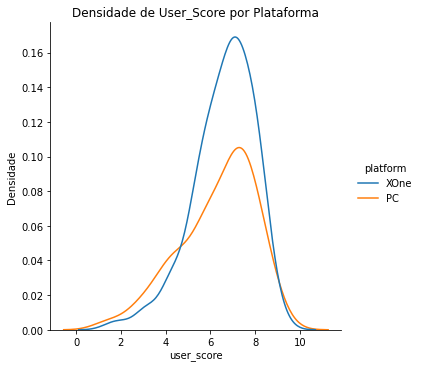

In [46]:
# Densidade de User_Score por Plataforma
sns.displot(data=games_atual.query('platform == "XOne" or platform == "PC"'), x='user_score', hue="platform", kind="kde");
plt.title('Densidade de User_Score por Plataforma');
plt.ylabel('Densidade')
plt.xlabel('user_score')
plt.show();

In [47]:
#Teste de Levene
platform_levene = levene(xone, pc)

print(f'p-value do teste de Levene:{platform_levene.pvalue}')

# Teste as hipóteses
if platform_levene.pvalue < alpha:
    platform_test = ttest_ind(xone, pc, nan_policy='omit', equal_var=False)
else:
    platform_test = ttest_ind(xone, pc, nan_policy='omit', equal_var=True)


print(f'p-value: {platform_test.pvalue}')

if platform_test.pvalue < alpha:
    print('Hipótese zero rejeitada')
else:
    print('Hipótese zero não pode ser rejeitada')

p-value do teste de Levene:0.014868430917663678
p-value: 0.11601398086668827
Hipótese zero não pode ser rejeitada


A hipótese zero não pode ser rejeitada, sendo assim, podemos afirmar que as classificações médias dos usuários das plataformas Xbox One e PC são as mesmas.

### Segundo Teste:

O segundo teste, as classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes.

- Hipótese nula: as classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são as mesmas.
- Hipótese alternativa: as classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes.

In [48]:
action = games_atual.query('genre == "Action"')['user_score'].dropna()

sports = games_atual.query('genre == "Sports"')['user_score'].dropna()


In [49]:
print(f'Média da classificação de action: {action.mean()}')
print(f'Variância da classificação de action: {action.var()}\n')

print(f'Média da classificação de sports: {sports.mean()}')
print(f'Variância da classificação de sports: {sports.var()}')


Média da classificação de action: 6.760606060606061
Variância da classificação de action: 1.8984766584766581

Média da classificação de sports: 5.2251968503937
Variância da classificação de sports: 3.446979127609048


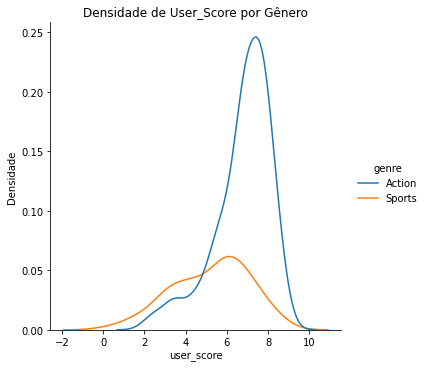

In [50]:
# Densidade de User_Score por Gênero
sns.displot(data=games_atual.query('genre == "Action" or genre == "Sports"'), x='user_score', hue="genre", kind="kde");
plt.title('Densidade de User_Score por Gênero');
plt.ylabel('Densidade')
plt.xlabel('user_score')
plt.show();

In [51]:
#Teste de Levene
genre_levene = levene(action, sports)

print(f'p-value do teste de Levene:{genre_levene.pvalue}')

# Teste as hipóteses
if genre_levene.pvalue < alpha:
    genre_test = ttest_ind(action, sports, nan_policy='omit', equal_var=False)
else:
    genre_test = ttest_ind(action, sports, nan_policy='omit', equal_var=True)

print(f'p-value: {genre_test.pvalue}')

if genre_test.pvalue < alpha:
    print('Hipótese zero rejeitada')
else:
    print('Hipótese zero não pode ser rejeitada')

p-value do teste de Levene:4.480161685830322e-06
p-value: 1.1825550382644557e-14
Hipótese zero rejeitada


A hipótese zero foi rejeitada, sendo assim, podemos afirmar que as classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes.

## Conclusão Geral 

Em primeiro lugar, foi feita uma observação inicial dos dados do dataframe, para identificar problemas que possam afetar a análise. Os problemas encontrados foram:

- Necessidade de colocar os nomes das colunas em letra minúscula;
- Uma colunas estava com o tipo incorreto;
- Seis colunas possuiam valores ausentes.

Os nomes das colunas e o tipo da coluna foram corrigidos. Os valores ausentes das colunas `critic_score`, `user_score` e `rating` não foram preenchidos por não haver valores na tabela que estajam ligados a eles. Dessa forma, também não foi possível identificar a razão deles estarem ausentes. Não foram deletados pois essas colunas serão necessarios para a análise. As outras colunas com valores ausentes as linhas que possuiam foram deletadas por não representarem mais que 1% do dataframe. Para aprimorar a análise foi criada a coluna `total_sales`.

Através da análise foi idenficado:

- Houve uma tendência de alta para o lançamento de jogos a cada ano, com o pico sendo 2008, seguido de uma tendência de queda até 2016.

- O tempo de vida de uma plataforma é de aproximadamente 10 anos.

- Os dados utilizados para a análise serão de 2014 a 2016.

- As plataformas que estão liderando as vendas em 2016 são o PS4 com 69 milhões, XOne com 26 milhões e o 3DS com quase 15 milhões de vendas de jogos para a plataforma.Entre 2015 e 2016 todas as plataformas estão em tedência de queda.

-  As plataformas possuem determinados jogos de representam a maior parte das vendas dessa plataformas.

- As avaliações de usuários não afetam as vendas totais dos jogos. As avaliações de profissionais possui uma relação positiva com as vendas totais.

- O jogo mais vendido do período de 2014 a 2016 foi o "Call of Duty: Black Ops 3", a maior parte das vendas foram no PS4 e no XOne, a distribuição da venda está relativa a distribuição das vendas totais por plataforma.

- Os gêneros mais lucrativos são "Shooter", "Action" e "Role-Playing". Os principais gêneros também são os que possuem os maiores outliners, sendo que esses outlines os jogos mais vendidos do período.

Foram criados perfis de usuários para cada região, para identificar se existem diferentes tedências, as regiões são América do Norte, Japão e Europa. O perfil de usuário da região da América do Norte e da Europa são bem parecidos, com o console PS4 liderando o mercado, na América do Norte o XOne tem vendas proximas do PS4, isso não é visto na Europa. Os principais gêneros sendo "Shooter" e "Action", a posição está invertida na Europa. O perfil do Japão é diferente, com o principal console sendo o 3DS. Os principais gêneros sendo "Role-Playing" e "Action", e a classificação mais comum sendo "T". O usuário japonês consome jogos de RPG jogando no consele 3DS. 

Foram feitos dois testes de hipóteses em relação as classificações médias dos usuários entre plataforma e gênero. Os testes demonstraram que as classificações médias dos usuários das plataformas Xbox One e PC são as mesmas e que as classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes. 

Em conclusão, a partir da análise uma boa campanha publicitária deveria focar na plataforma PS4 para jogos do tipo "Shooter" e "Action", com classificação "M", nas regiões da América do Norte e Europa.

